In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout




print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("OpenCV version:", cv2.__version__)
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)


NumPy version: 2.0.2
Matplotlib version: 3.9.4
OpenCV version: 4.11.0
scikit-learn version: 1.6.1
TensorFlow version: 2.19.0


In [6]:
IMG_SIZE = 32  # We'll resize all images to 32x32 pixels
DATASET_PATH = "./train"  # Folder containing character subfolders


In [7]:
def load_images_from_folder(folder_path):
    X, y = [], []
    label_map = {}
    label_num = 0

    for label_folder in sorted(os.listdir(folder_path)):
        path = os.path.join(folder_path, label_folder)
        if not os.path.isdir(path):
            continue
        
        if label_folder not in label_map:
            label_map[label_folder] = label_num
            label_num += 1
        
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))       # Resize to 32x32
                X.append(img)
                y.append(label_map[label_folder])
            except:
                print("Error loading:", img_path)

    return np.array(X), np.array(y), label_map


In [14]:
X, y, label_map = load_images_from_folder(DATASET_PATH)

# Normalize pixel values (0-1) and reshape
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = to_categorical(y)

# Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Number of classes:", len(label_map))


X_train shape: (62560, 32, 32, 1)
y_train shape: (62560, 46)
Number of classes: 46


In [17]:

model = Sequential([
    Input(shape=(32, 32, 1)),  # 👈 this replaces input_shape in Conv2D

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,790 (1.22 MB)

 Trainable params: 319,790 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)


Epoch 1/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.4695 - loss: 1.9709 - val_accuracy: 0.9038 - val_loss: 0.3276
Epoch 2/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8280 - loss: 0.5636 - val_accuracy: 0.9411 - val_loss: 0.2065
Epoch 3/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8745 - loss: 0.4046 - val_accuracy: 0.9529 - val_loss: 0.1575
Epoch 4/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8980 - loss: 0.3204 - val_accuracy: 0.9603 - val_loss: 0.1384
Epoch 5/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9144 - loss: 0.2719 - val_accuracy: 0.9636 - val_loss: 0.1200
Epoch 6/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9244 - loss: 0.2340 - val_accuracy: 0.9657 - val_loss: 0.1145
Epoch 7/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9336 - loss: 0.2059 - val_accuracy: 0.9699 - val_loss: 0.0990
Epoch 8/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9418 - loss: 0.1768 - 

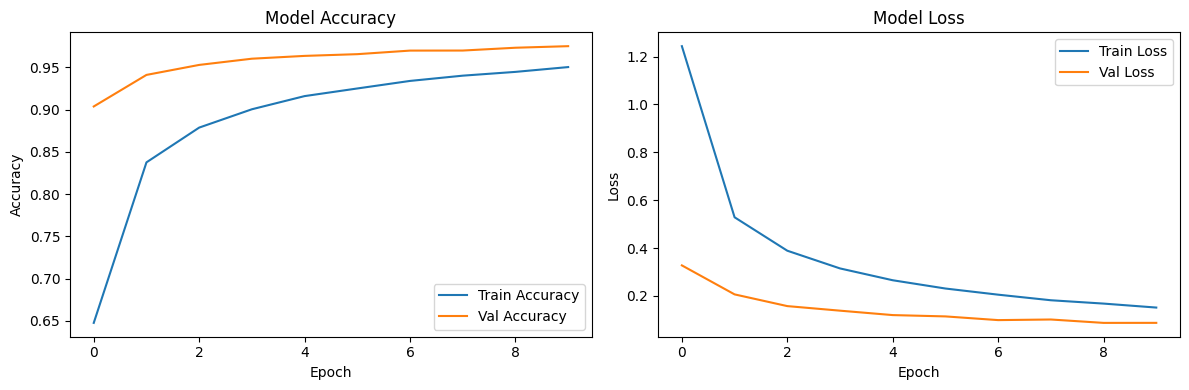

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


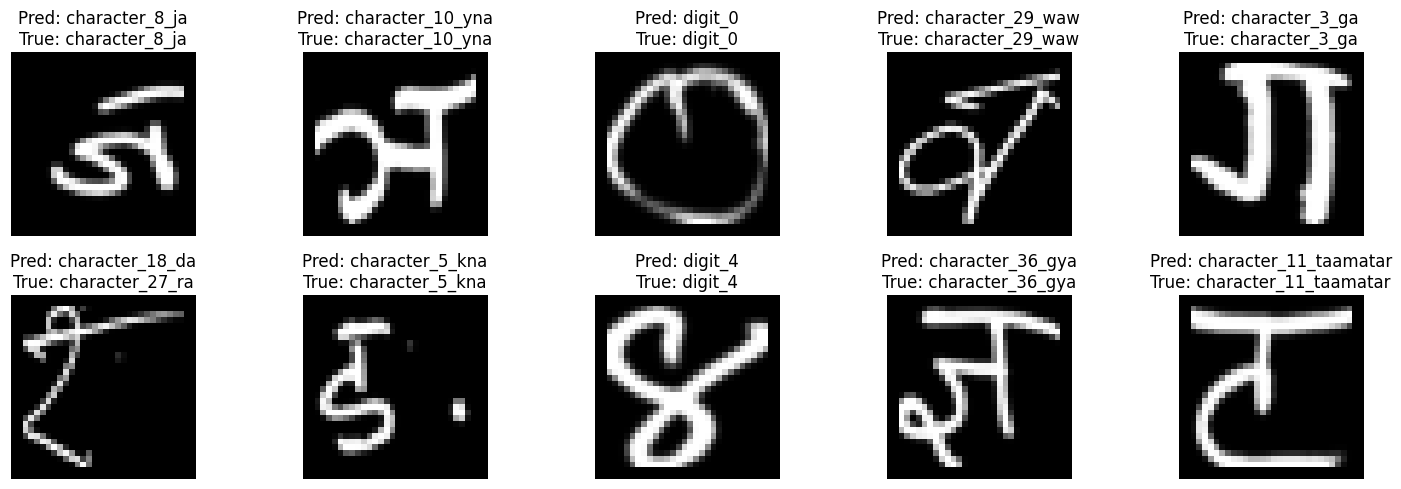

In [23]:
# Reverse the label_map for decoding predictions
label_map_rev = {v: k for k, v in label_map.items()}

# Predict first 10 images from validation set
predictions = model.predict(X_val[:10])
predicted_classes = predictions.argmax(axis=1)
true_classes = y_val[:10].argmax(axis=1)

# Plot images with predicted and actual labels
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val[i].reshape(32, 32), cmap='gray')
    plt.title(f"Pred: {label_map_rev[predicted_classes[i]]}\nTrue: {label_map_rev[true_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [27]:
print("✅ Model saved successfully.")

✅ Model saved successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


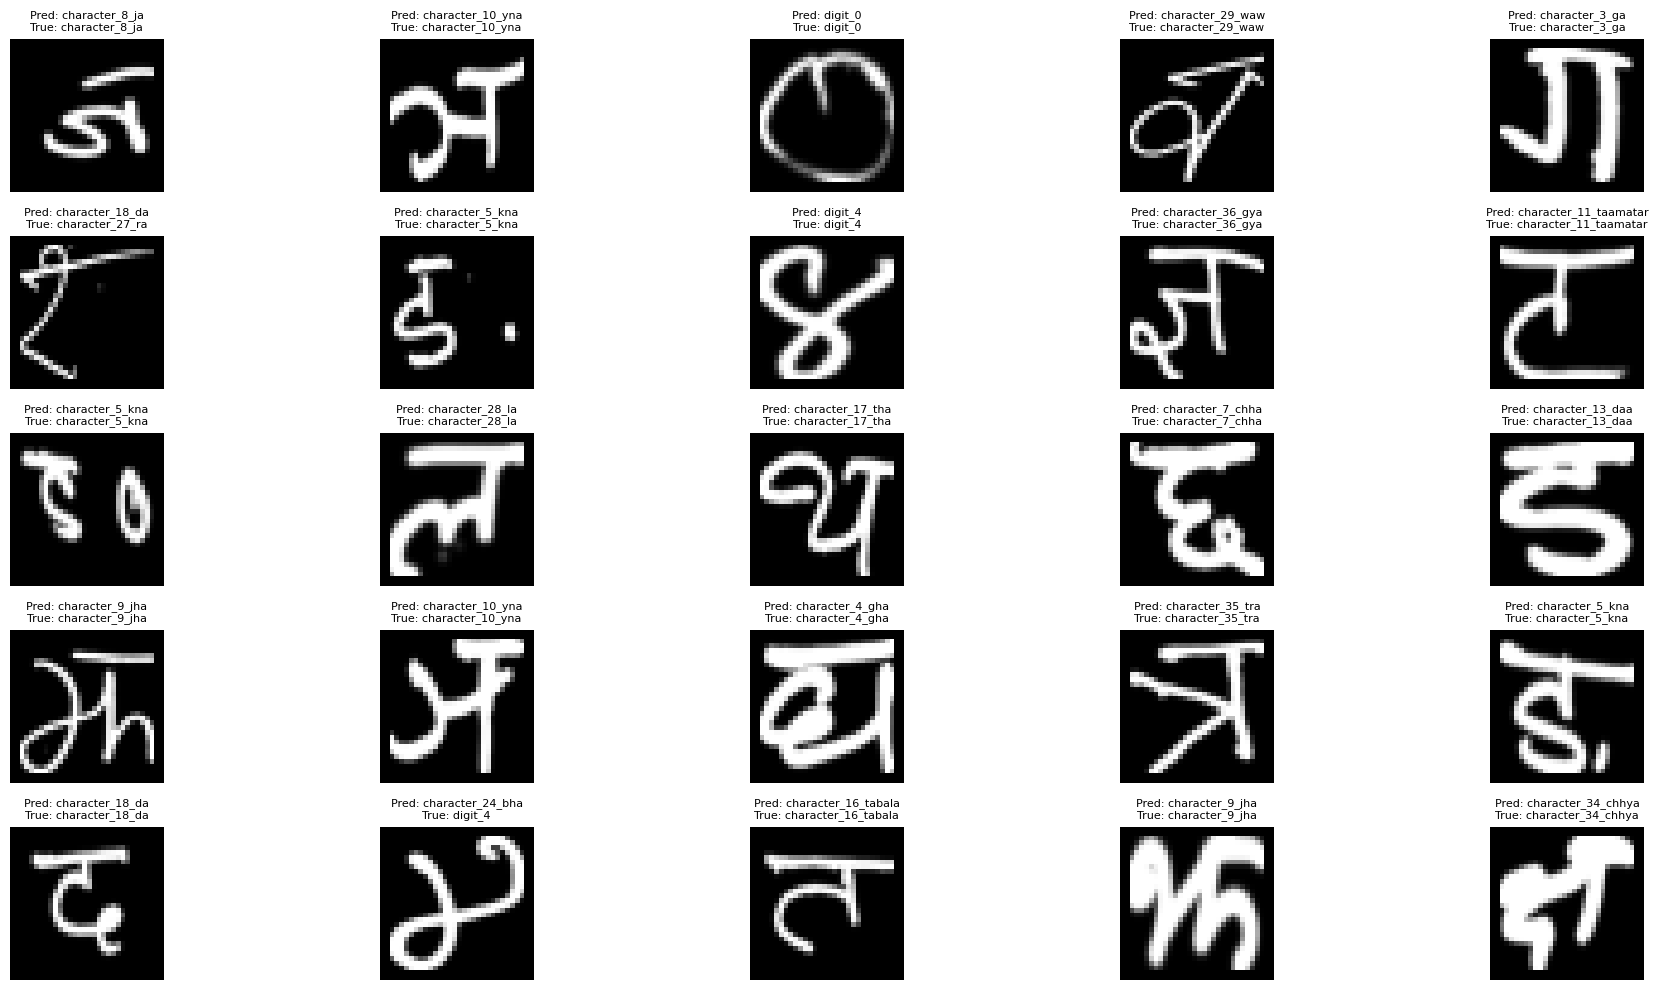

In [28]:
# Show 25 predicted images instead of 10
num_images = 25  # Change this number to however many you want

# Make predictions
predictions = model.predict(X_val[:num_images])
predicted_classes = predictions.argmax(axis=1)
true_classes = y_val[:num_images].argmax(axis=1)

# Plot images
plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)  # 5x5 grid
    plt.imshow(X_val[i].reshape(32, 32), cmap='gray')
    plt.title(f"Pred: {label_map_rev[predicted_classes[i]]}\nTrue: {label_map_rev[true_classes[i]]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


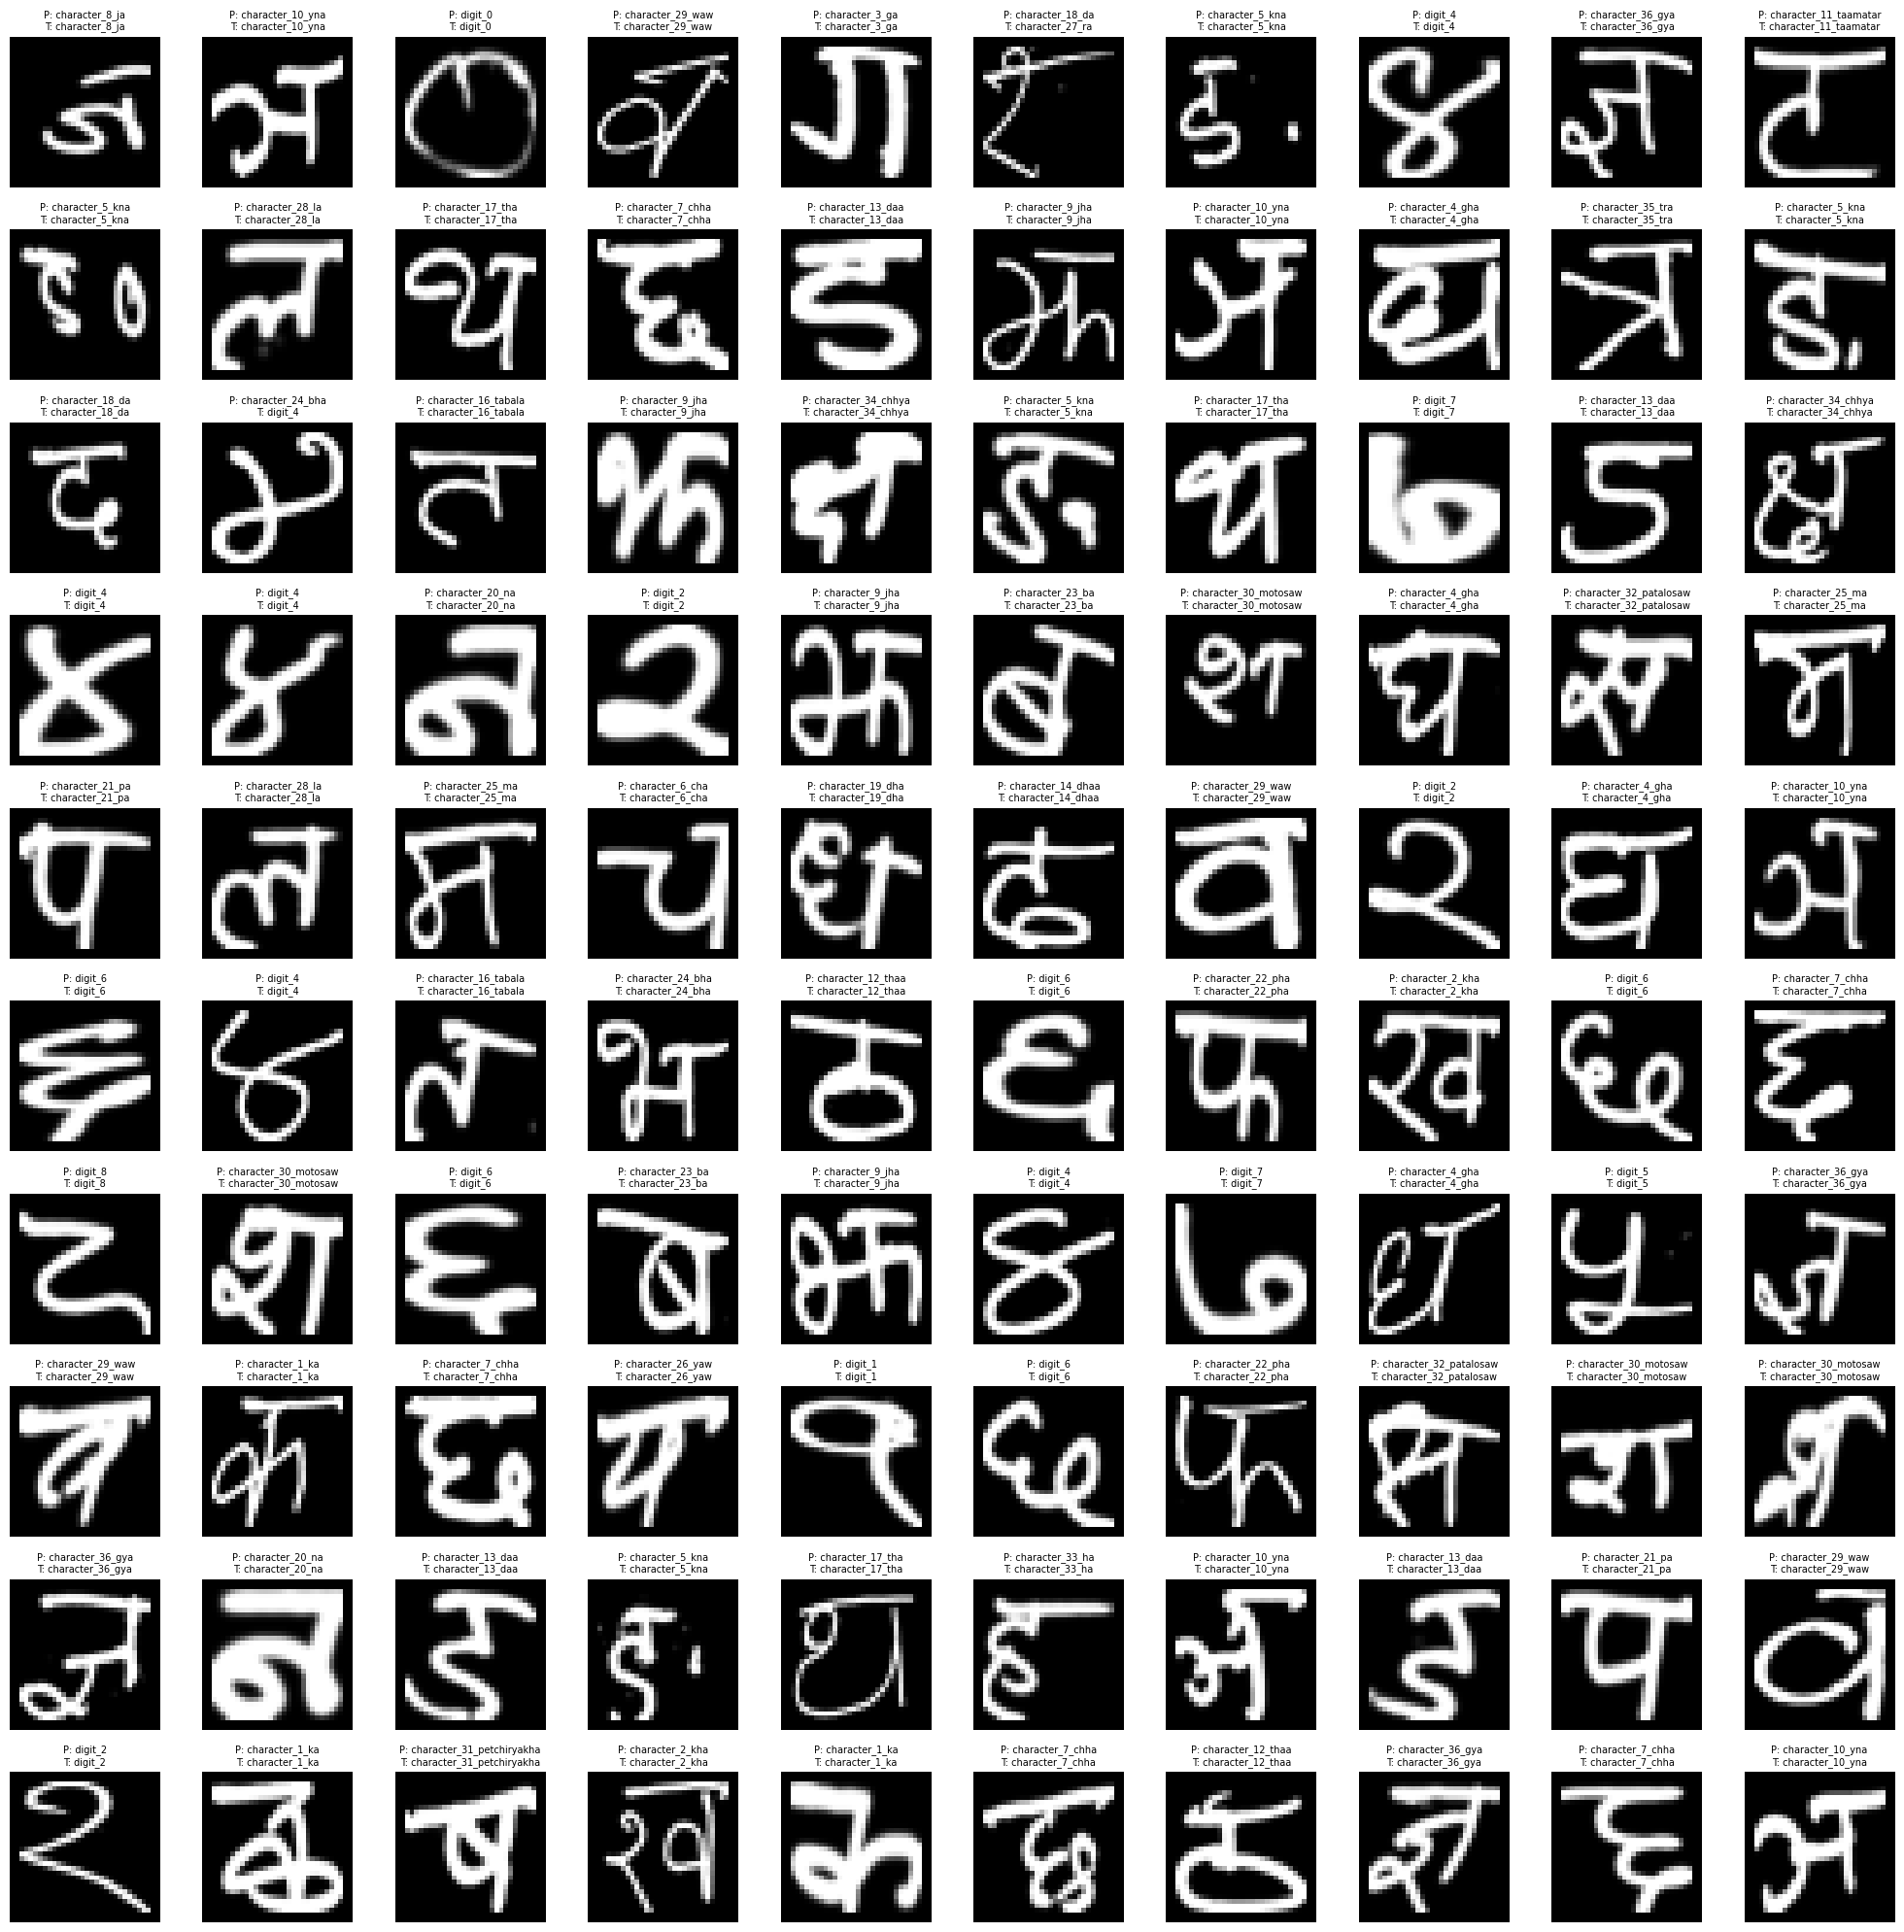

In [29]:
num_images = 100  # total number of images to display
rows, cols = 10, 10  # adjust grid size

# Predict
predictions = model.predict(X_val[:num_images])
predicted_classes = predictions.argmax(axis=1)
true_classes = y_val[:num_images].argmax(axis=1)

# Plot images with predictions
plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_val[i].reshape(32, 32), cmap='gray')
    plt.title(f"P: {label_map_rev[predicted_classes[i]]}\nT: {label_map_rev[true_classes[i]]}", fontsize=7)
    plt.axis('off')

plt.tight_layout()
plt.show()
